In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving creditcard.csv to creditcard.csv
User uploaded file "creditcard.csv" with length 150828752 bytes


In [3]:

!pip install imblearn

In [0]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import roc_curve

In [6]:
df=pd.read_csv("creditcard.csv",index_col= False)
print('Shape of the data set is {}'.format(df.shape))

Shape of the data set is (284807, 31)


In [0]:
df= shuffle(df)

In [8]:

X= df
y= df['Class']
print("Original Dimensions of X:{} and y:{} ". format(X.shape, y.shape))

Original Dimensions of X:(284807, 31) and y:(284807,) 


In [9]:
print(y.head())

181818    0
138414    0
259531    0
156801    0
70087     0
Name: Class, dtype: int64


In [0]:
X,y= shuffle(X,y,random_state=1)

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [0]:
# Need to split again
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.15)

In [0]:
ada = ADASYN(random_state=42)
X_train_res, y_train_res = ada.fit_sample(X_train,y_train)

In [14]:
# Initalize the Keras Network
model = Sequential()

# First hidden layer
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu', input_dim = 31))

# Add  the Second hidden Layer
model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Add the third hidden layer
#model.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))

# Output Layer
# Adding the output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=31, units=6, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [0]:
# Fit the model and save in the history Object
history = model.fit(X_train_res, y_train_res, validation_split=0.15, epochs=100, batch_size=100, verbose=0)

In [0]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [0]:
import itertools
class_names = [0,1]


In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[42643    10]
 [    0    69]]


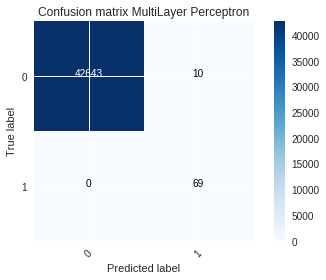

In [27]:
plot_confusion_matrix(cm,class_names,  title='Confusion matrix MultiLayer Perceptron')

In [25]:
from sklearn.metrics import recall_score
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TP = cm[1,1]
TPR_MLP=recall_score(y_test,y_pred)
TNR_MLP= TN/(TN + FP)
FPR_MLP= FP/(TN + FP)
FNR_MLP= FN/(TP + FN)

print(TPR_MLP)
print(TNR_MLP)
print(FPR_MLP)
print(FNR_MLP)

1.0
0.9997655499027032
0.00023445009729679037
0.0


In [26]:
print(" Classification Accuracy-- ",accuracy_score(y_test,y_pred ))
print(" Classification Error   -- ",(1- accuracy_score(y_test,y_pred )))  
print(" Sensitivity/TPR/Recall -- ",recall_score(y_test,y_pred ))
print(" Specificity /TNR       -- ",(TN/(TN + FP)))
print(" False Positive Rate/FPR-- ",(FP/(TN + FP)))
print(" Miss Rate / FNR         -- ",(FN/(TP + FN)))

 Classification Accuracy--  0.9997659285613969
 Classification Error   --  0.00023407143860310065
 Sensitivity/TPR/Recall --  1.0
 Specificity /TNR       --  0.9997655499027032
 False Positive Rate/FPR--  0.00023445009729679037
 Miss Rate / FNR         --  0.0
